In [25]:
import pandas as pd

# Load data
data = pd.read_csv('Crash_Reporting_-_Drivers_Data.csv')

C:\Users\Krish\AppData\Local\Temp\ipykernel_28044\4276207541.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Crash_Reporting_-_Drivers_Data.csv')


In [26]:
# Inspect the first few rows of the dataset
print(data.head())

# Check the dataset's shape
print(data.shape)

# Get a concise summary of the dataframe
print(data.info())

# Summary statistics for numeric columns
print(data.describe())


  Report Number Local Case Number                Agency Name  \
0   MCP3170003V         240000438   Montgomery County Police   
1   MCP3254003K         230072050   Montgomery County Police   
2    EJ7887003Q         230074270  Gaithersburg Police Depar   
3   MCP2674004J         230064598   Montgomery County Police   
4   MCP25280008         230067019   Montgomery County Police   

        ACRS Report Type         Crash Date/Time        Route Type  \
0  Property Damage Crash  01/03/2024 02:55:00 PM               NaN   
1           Injury Crash  12/16/2023 12:36:00 PM  Maryland (State)   
2           Injury Crash  12/29/2023 12:00:00 PM  Maryland (State)   
3  Property Damage Crash  11/05/2023 09:07:00 PM  Maryland (State)   
4  Property Damage Crash  11/18/2023 12:40:00 AM  Maryland (State)   

          Road Name Cross-Street Type Cross-Street Name  \
0               NaN               NaN               NaN   
1     GERMANTOWN RD            County    MIDDLEBROOK RD   
2  GREAT SENECA H

In [32]:
# Check for missing values
print(data.isnull().sum())

Report Number                          0
Local Case Number                      0
Agency Name                            0
ACRS Report Type                       0
Crash Date/Time                        0
Route Type                         16973
Road Name                          15937
Cross-Street Type                  17006
Cross-Street Name                  15951
Off-Road Description              156170
Municipality                      152979
Related Non-Motorist              166642
Collision Type                       585
Weather                            13354
Surface Condition                  20118
Light                               1445
Traffic Control                    25469
Driver Substance Abuse             31324
Non-Motorist Substance Abuse      167788
Person ID                              0
Driver At Fault                        0
Injury Severity                        0
Circumstance                      140746
Driver Distracted By                   0
Drivers License 

In [33]:
cleaned_data = data.dropna()

CLEAR                       116774
RAINING                      20608
CLOUDY                       17294
SNOW                          1444
UNKNOWN                        692
FOGGY                          676
WINTRY MIX                     391
OTHER                          370
SLEET                          218
SEVERE WINDS                   154
BLOWING SNOW                   115
BLOWING SAND, SOIL, DIRT        15
Name: Weather, dtype: int64


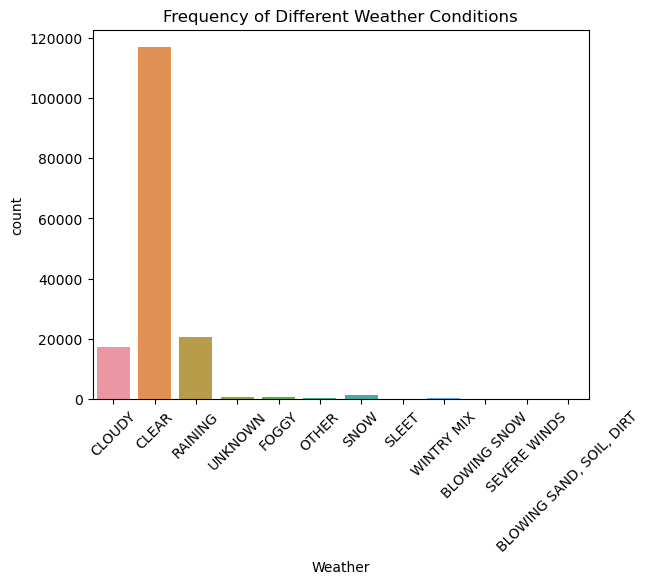

In [35]:
# Frequency of categories within a column
print(data['Weather'].value_counts())

# You can also visualize this
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data, x='Weather')
plt.title('Frequency of Different Weather Conditions')
plt.xticks(rotation=45)
plt.show()

Clear Dominance: The vast majority of crashes occur in clear weather. This could be due to the fact that drivers are more likely to be on the road when the weather is clear, leading to a higher incidence of crashes simply due to increased traffic volumes.

Rain and Cloudy Weather: There is a notable number of crashes in rainy and cloudy conditions, which makes sense as these weather types can reduce visibility and road grip, leading to more accidents.

Adverse Weather: Crashes in snow, fog, and other severe conditions like sleet and "wintry mix" occur less frequently. This could be due to fewer people choosing to drive during such conditions, or it could reflect effective measures taken by drivers, such as driving more cautiously, when adverse weather is expected.

Data Collection Bias: The "Unknown" category has a substantial count, which indicates that in many cases, the weather condition at the time of the crash was not recorded. This could affect the accuracy of weather-related insights and should be considered when drawing conclusions.

Rare Conditions: Conditions like "Severe Winds" and "Blowing Sand, Soil, Dirt" account for a very small number of crashes, suggesting that these are either rare occurrences or typically do not contribute significantly to crashes.

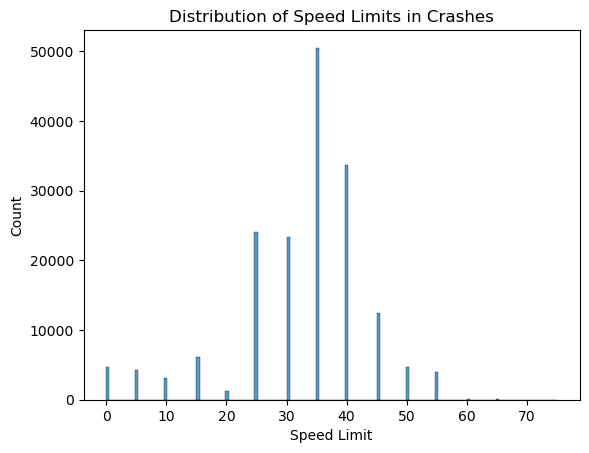

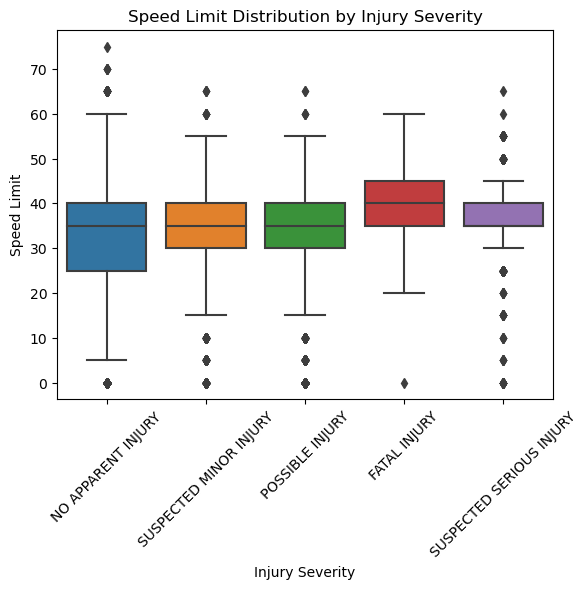

In [36]:
# Histogram of numeric data
sns.histplot(data['Speed Limit'])
plt.title('Distribution of Speed Limits in Crashes')
plt.show()

# Boxplot for numeric data by category
sns.boxplot(x='Injury Severity', y='Speed Limit', data=data)
plt.title('Speed Limit Distribution by Injury Severity')
plt.xticks(rotation=45)
plt.show()

Depicting the distribution of speed limits in crashes, suggests that crashes frequently occur in zones with speed limits of 30 and 40 mph, with a particularly high peak at 40 mph. This peak might indicate that crashes are more prevalent in areas with moderate speed limits, which could correspond to urban or suburban areas where traffic is denser. Interestingly, there is a relatively low number of crashes recorded in zones with very low (<20 mph) and very high (>60 mph) speed limits, possibly due to less traffic in these areas or because they are less common speed limits.








Box plot showing speed limit distribution by injury severity, reveals that most crash severities, from no apparent injury to fatal injuries, have median speed limits around 30 to 35 mph. The spread and interquartile range of speed limits are fairly consistent across different injury severities, but there are notable outliers, especially in the 'Fatal Injury' and 'Suspected Serious Injury' categories, which have instances of high-speed limits upwards of 55 mph. This indicates that while crashes at higher speed limits are less frequent, they are associated with more severe injuries when they do occur.

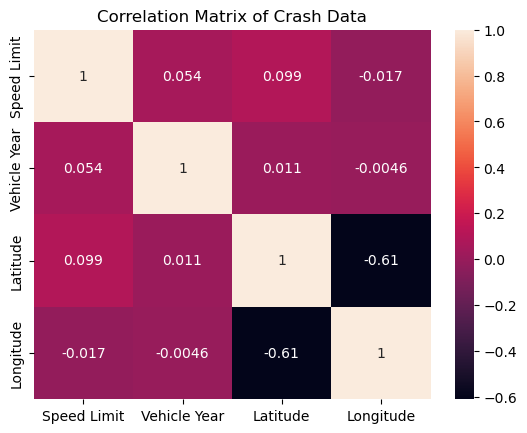

In [37]:
# Correlation matrix of numeric data
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix of Crash Data')
plt.show()


The heatmap displays a correlation matrix between several variables in the crash data. Most correlations are very weak, close to zero, which suggests no linear relationship between them. For example, the correlation between 'Vehicle Year' and 'Speed Limit' is 0.054, indicating almost no relationship. The strongest correlation observed is negative between 'Latitude' and 'Longitude' (-0.61), which may suggest a geographical pattern or trend within the data, such as a specific direction where crashes are more frequent. However, this could also be a characteristic of the area covered by the dataset rather than an insightful trend. The lack of significant correlation between speed limits and vehicle year with latitude or longitude implies that crashes are evenly distributed across different vehicle models and speed zones, without any particular bias towards specific locations or vehicle ages.

In [10]:
import pandas as pd

# Load data
data = pd.read_csv('Crash_Reporting_-_Drivers_Data.csv')

# Prepare data
data['Crash Date/Time'] = pd.to_datetime(data['Crash Date/Time'], errors='coerce')
data['Year'] = data['Crash Date/Time'].dt.year

# Analyze the relationship between driver distraction and injury severity
distraction_injury_data = data[['Driver Distracted By', 'Injury Severity']].dropna()
distraction_injury_distribution = pd.crosstab(distraction_injury_data['Driver Distracted By'],
                                              distraction_injury_data['Injury Severity'])

print(distraction_injury_distribution)


C:\Users\Krish\AppData\Local\Temp\ipykernel_28044\1210437884.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Crash_Reporting_-_Drivers_Data.csv')


Injury Severity                                    FATAL INJURY  \
Driver Distracted By                                              
ADJUSTING AUDIO AND OR CLIMATE CONTROLS                       0   
BY MOVING OBJECT IN VEHICLE                                   0   
BY OTHER OCCUPANTS                                            0   
DIALING CELLULAR PHONE                                        0   
DISTRACTED BY OUTSIDE PERSON OBJECT OR EVENT                  0   
EATING OR DRINKING                                            0   
INATTENTIVE OR LOST IN THOUGHT                                0   
LOOKED BUT DID NOT SEE                                        1   
NO DRIVER PRESENT                                             0   
NOT DISTRACTED                                               14   
OTHER CELLULAR PHONE RELATED                                  0   
OTHER DISTRACTION                                             1   
OTHER ELECTRONIC DEVICE (NAVIGATIONAL PALM PILOT)             

Not Distracted: A significant number of drivers were not distracted, yet they were involved in a range of injury severities, from no apparent injury to fatal injuries. This suggests that not being distracted does not completely safeguard against severe outcomes, possibly due to external factors like the behavior of other drivers or road conditions.

Unknown Distractions: There's a large category labeled "Unknown", indicating many cases where the distraction type wasn't identified or recorded. This group also shows a broad spectrum of injury severities.

Specific Distractions:
Inattentive or Lost in Thought: This type of distraction is associated with higher instances of more serious injuries compared to other specific distractions.

Distractions by Outside Person, Object, or Event: Relatively common and associated with various injury levels, including suspected serious injuries.

Using Cellular Phones (Talking, Texting, Dialing): While not the most frequent distraction, these activities are involved in various crash severities, including non-fatal and suspected serious injuries.

High Severity Injuries: Categories like "Unknown" and "Inattentive or Lost in Thought" have higher proportions of more severe outcomes (serious injuries and fatalities). This could imply that when the distraction is either unknown or cognitive, the outcomes are more severe due to the lack of any preemptive corrective action by the driver.

Most Common Distractions: The most numerically significant distractions involve passive states (e.g., lost in thought) or internal car interactions (e.g., with other occupants), which suggests that even non-technological factors are critical contributors to road safety issues.

Fatalities and Serious Injuries: Fatal and serious injuries, while less frequent, are most common among "Unknown" distractions, possibly indicating incidents with high speeds or other severe contributing factors.

2.	How has the trend of crashes evolved over the period spanning from 2015 to 2024?

In [11]:
# Filter data from 2015 to 2024 and count the number of crashes per year
crash_trends = data[(data['Year'] >= 2015) & (data['Year'] <= 2024)].groupby('Year').size()
print(crash_trends)


Year
2015    20286
2016    21778
2017    21541
2018    21042
2019    20941
2020    13809
2021    16208
2022    17582
2023    18916
2024        2
dtype: int64


This data indicates a general stability in crash numbers with a noticeable dip in 2020, likely due to reduced traffic volumes during the pandemic. The numbers start to recover in 2021 and continue to rise in subsequent years.

In [12]:
# Get counts of impact locations and their corresponding injury severities
impact_injury_data = data[['Vehicle First Impact Location', 'Injury Severity']].dropna()
impact_injury_distribution = pd.crosstab(impact_injury_data['Vehicle First Impact Location'],
                                         impact_injury_data['Injury Severity'])

print(impact_injury_distribution)

Injury Severity                FATAL INJURY  NO APPARENT INJURY  \
Vehicle First Impact Location                                     
EIGHT OCLOCK                              1                3126   
ELEVEN OCLOCK                            14               11522   
FIVE OCLOCK                               0                3719   
FOUR OCLOCK                               3                3666   
NINE OCLOCK                              12                2509   
NON-COLLISION                             0                 348   
ONE OCLOCK                               10               14009   
ROOF TOP                                  2                 297   
SEVEN OCLOCK                              0                3884   
SIX OCLOCK                                0               26786   
TEN OCLOCK                                5                5049   
THREE OCLOCK                              9                2746   
TWELVE OCLOCK                            86               5463

Twelve O'clock (Frontal Impact): This is the most common impact location and is associated with the highest numbers across all injury severities, including fatal injuries (86), suspected serious injuries (785), and minor injuries. This suggests that frontal impacts are generally more severe compared to other impact directions.

Six O'clock (Rear Impact): While rear impacts are the most common for no apparent injury cases (26,786), they also account for a significant number of more serious injuries, including suspected serious injuries (138). This contradicts the general assumption that rear impacts are less severe.

Side Impacts (Nine, Three, Eleven, and One O'clock): These are associated with a mix of injury severities, with notable numbers in suspected serious injuries, especially for impacts at Eleven O'clock (99) and One O'clock (88).

From this analysis, it is evident that frontal impacts (Twelve O'clock) are associated with a higher likelihood of severe injuries or fatalities, which aligns with your hypothesis about impact locations influencing injury severity.

4.	Can we identify any trends or patterns in the frequency of crashes based on the age of vehicles involved? Do older vehicles tend to be involved 

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate vehicle age and count crashes
valid_vehicle_data = data[(data['Vehicle Year'] > 1900) & (data['Vehicle Year'] <= 2024)]
current_year = 2024
valid_vehicle_data['Vehicle Age'] = current_year - valid_vehicle_data['Vehicle Year']
vehicle_age_crash_frequency = valid_vehicle_data['Vehicle Age'].value_counts().sort_index()

print(vehicle_age_crash_frequency.head(30))  # Displays the first 30 years for clarity

0        64
1       733
2      1663
3      2584
4      3475
5      5472
6      6738
7      9093
8     11207
9     11861
10    11632
11    10937
12     9337
13     8368
14     7430
15     6783
16     7906
17     7926
18     7413
19     6499
20     6150
21     5358
22     4278
23     3482
24     3263
25     2182
26     1636
27     1279
28      803
29      622
Name: Vehicle Age, dtype: int64


C:\Users\Krish\AppData\Local\Temp\ipykernel_28044\458268347.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_vehicle_data['Vehicle Age'] = current_year - valid_vehicle_data['Vehicle Year']


5.	Can a regression model be developed to predict the driver distraction based on the factors such as traffic control measures, roadway features, and collision circumstances, while considering the potential mediating effects of driver characteristics and vehicle-related factors?

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Encode categorical data
le = LabelEncoder()
predictors = ['Weather', 'Surface Condition', 'Light', 'Traffic Control', 'Collision Type', 'Vehicle Body Type', 'Speed Limit']
for col in predictors:
    data[col] = le.fit_transform(data[col].astype(str))
X = data[predictors].fillna(0)  # Filling missing values with 0
y = le.fit_transform(data['Driver Distracted By'].astype(str))

# Split data and fit model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
report = classification_report(y_test, predictions, target_names=le.classes_)

print(report)

C:\Users\Krish\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Krish\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Krish\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision

                                                   precision    recall  f1-score   support

          ADJUSTING AUDIO AND OR CLIMATE CONTROLS       0.00      0.00      0.00        25
                      BY MOVING OBJECT IN VEHICLE       0.00      0.00      0.00        47
                               BY OTHER OCCUPANTS       0.00      0.00      0.00        96
                           DIALING CELLULAR PHONE       0.00      0.00      0.00        11
     DISTRACTED BY OUTSIDE PERSON OBJECT OR EVENT       0.00      0.00      0.00       199
                               EATING OR DRINKING       0.00      0.00      0.00        34
                   INATTENTIVE OR LOST IN THOUGHT       0.00      0.00      0.00       873
                           LOOKED BUT DID NOT SEE       0.00      0.00      0.00      4353
                                NO DRIVER PRESENT       0.00      0.00      0.00        60
                                   NOT DISTRACTED       0.62      1.00      0.77     2135

The model shows very low precision and recall for most categories except "Not Distracted", which suggests the model is heavily biased towards predicting this most frequent class.

6.	What factors predict the happening of a traffic accident resulting in severe injuries or fatalities? Can a logistic regression model accurately classify accidents into low-severity categories based on roadway characteristics, weather conditions, and driver-related variables?

In [15]:
# Define and encode injury severity categories
data['Injury Severity Category'] = data['Injury Severity'].apply(lambda x: 'High Severity' if x in ['FATAL INJURY', 'SUSPECTED SERIOUS INJURY'] else 'Low Severity')
y_severity = le.fit_transform(data['Injury Severity Category'].astype(str))

# Split data for severity prediction
X_train_severity, X_test_severity, y_train_severity, y_test_severity = train_test_split(X, y_severity, test_size=0.2, random_state=42)
model_severity = LogisticRegression(max_iter=1000)
model_severity.fit(X_train_severity, y_train_severity)
predictions_severity = model_severity.predict(X_test_severity)
report_severity = classification_report(y_test_severity, predictions_severity, target_names=le.classes_)

print(report_severity)

               precision    recall  f1-score   support

High Severity       0.00      0.00      0.00       299
 Low Severity       0.99      1.00      1.00     34122

     accuracy                           0.99     34421
    macro avg       0.50      0.50      0.50     34421
 weighted avg       0.98      0.99      0.99     34421



C:\Users\Krish\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Krish\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Krish\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Low Severity:
    
Precision: 0.99 (model is highly accurate in predicting low-severity cases)
Recall: 1.00 (model correctly identified almost all low-severity cases)

What is the relationship between weather conditions and crash severity?

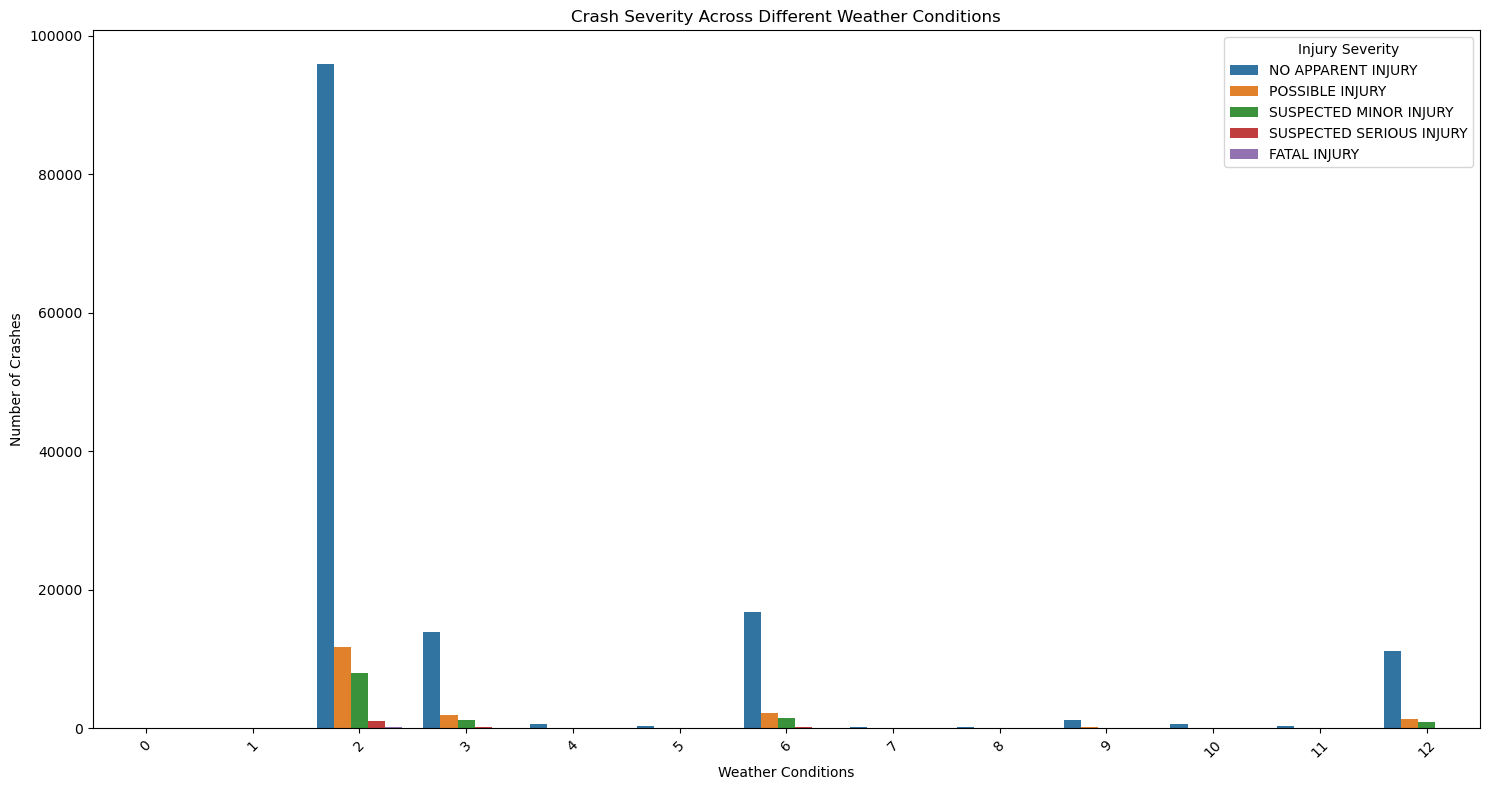

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame with crash data
weather_severity_df = data.groupby(['Weather', 'Injury Severity'])['Report Number'].count().reset_index()
weather_severity_df.rename(columns={'Report Number': 'Count'}, inplace=True)

plt.figure(figsize=(15, 8))
sns.barplot(x='Weather', y='Count', hue='Injury Severity', data=weather_severity_df)
plt.title('Crash Severity Across Different Weather Conditions')
plt.xticks(rotation=45)
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Crashes')
plt.legend(title='Injury Severity')
plt.tight_layout()
plt.show()

The bar chart displays the number of traffic crashes against different weather conditions, segmented by injury severity. The tallest bar indicates most crashes occur in one particular weather condition, predominantly resulting in no injuries. Other segments show fewer crashes with possible, minor, suspected serious, and fatal injuries, respectively. The data suggests a clear predominance of one weather condition leading to the majority of crashes, but specific details are obscured due to unreadable x-axis labels. The chart intends to relate crash frequency and severity with weather but lacks clarity on the exact conditions analyzed.

Does the time of day affect the likelihood of crashes or their severity?

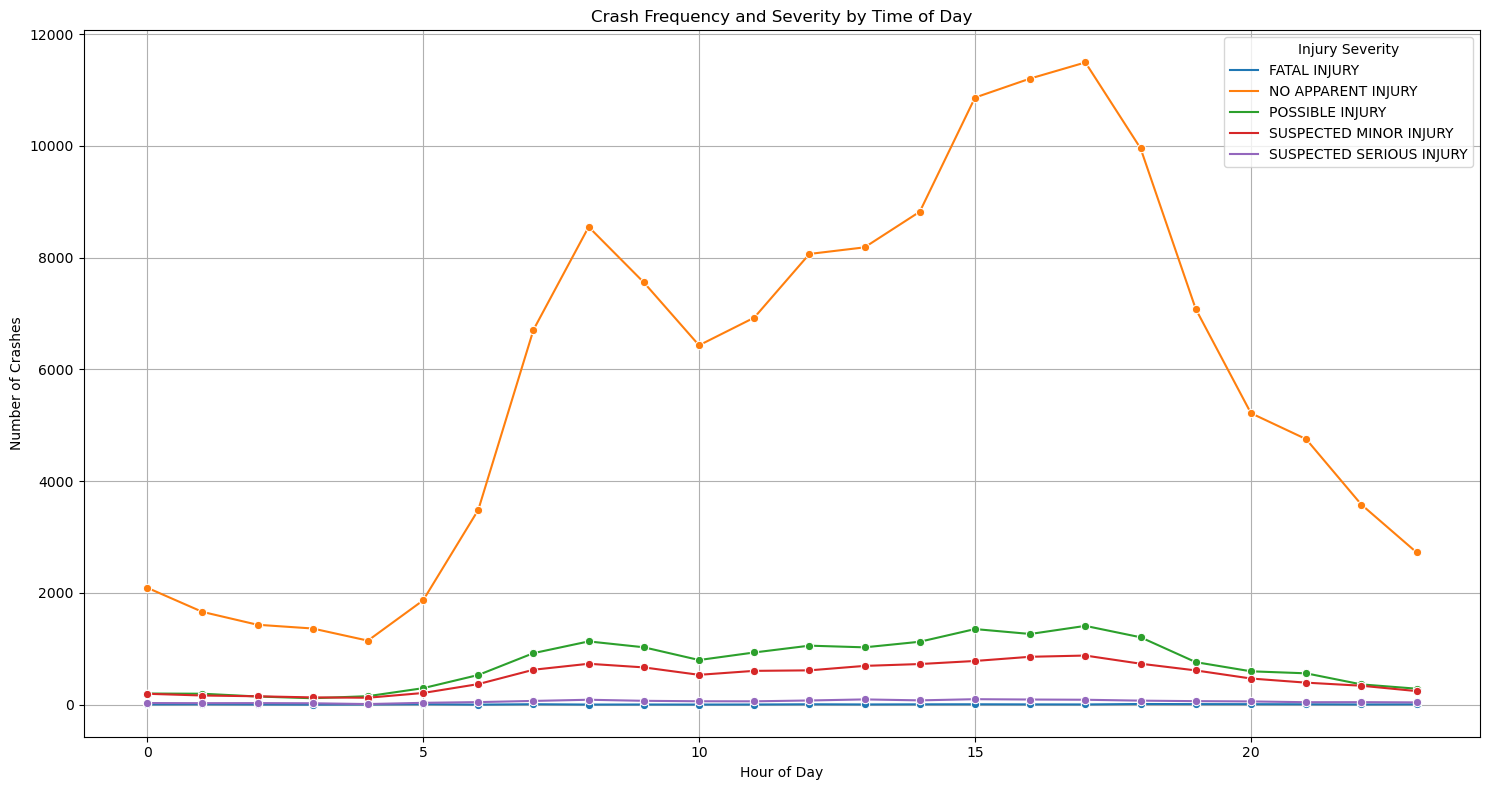

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Crash Date/Time' to datetime and extract hour
data['Crash Hour'] = pd.to_datetime(data['Crash Date/Time']).dt.hour

time_severity_df = data.groupby(['Crash Hour', 'Injury Severity'])['Report Number'].count().reset_index()
time_severity_df.rename(columns={'Report Number': 'Count'}, inplace=True)

plt.figure(figsize=(15, 8))
sns.lineplot(x='Crash Hour', y='Count', hue='Injury Severity', data=time_severity_df, marker='o')
plt.title('Crash Frequency and Severity by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crashes')
plt.legend(title='Injury Severity')
plt.grid(True)
plt.tight_layout()
plt.show()

Peak Times: There's a significant peak in the number of crashes (the orange line) around the 15th hour (3 PM), suggesting a time of high risk for accidents.

Severity Distribution: While the total number of crashes spikes in the afternoon, the severity of these crashes mostly involves no apparent injury or non-fatal injuries. Fatal injuries (the red line) remain relatively low throughout the day.

Non-Peak Hours: The frequency of crashes is considerably lower during the early morning hours (0 to 5 AM), which could indicate fewer vehicles on the road or less reporting during these hours.

Evening Decline: Post the afternoon peak, there's a sharp decline in crash frequency, which could be related to decreasing traffic as the evening progresses.

Consistency in Severity: The severity of crashes appears relatively consistent across the hours, with no apparent injury being the most common outcome.

Are certain types of traffic control associated with a lower frequency of crashes?

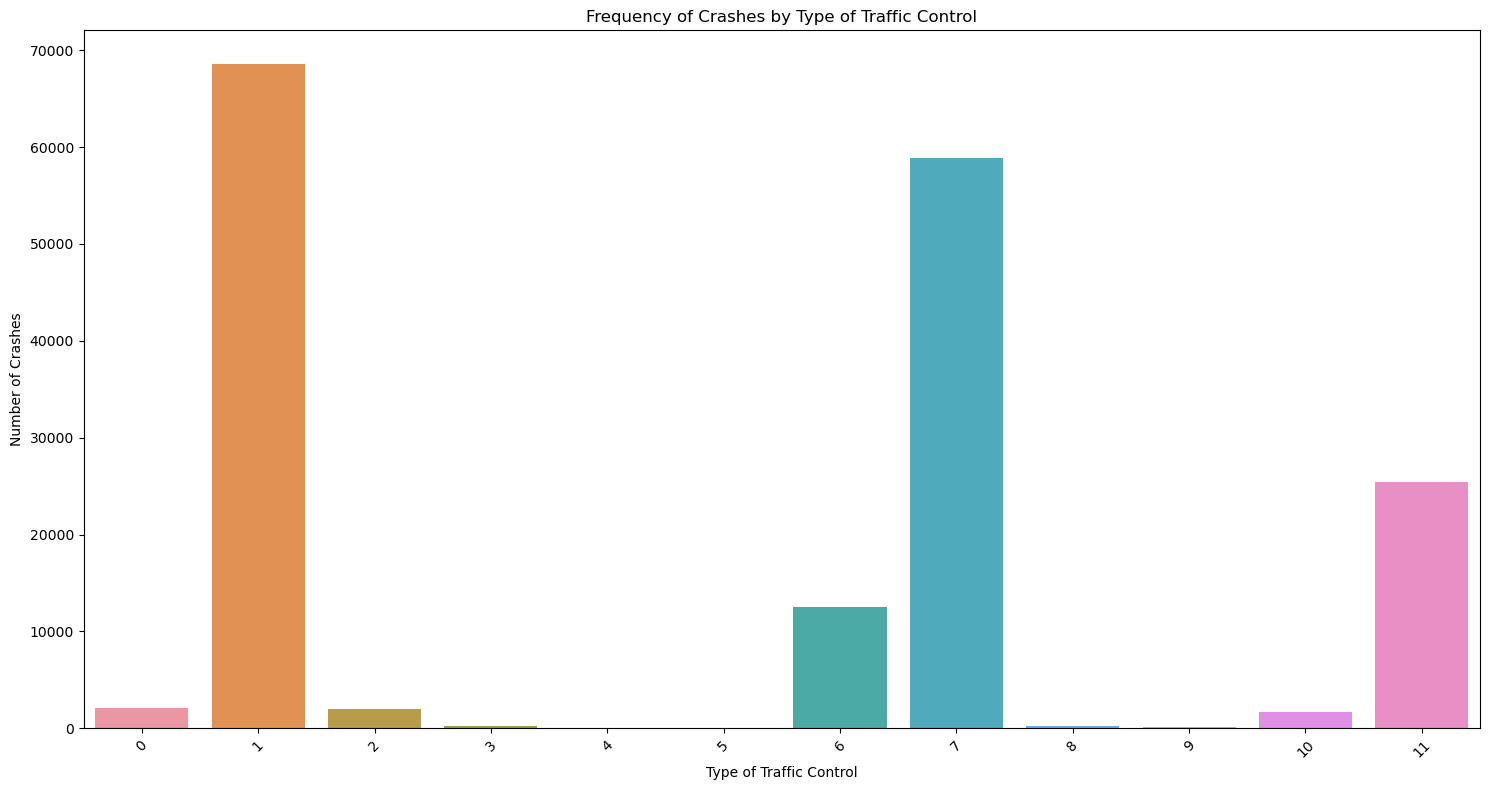

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Traffic Control' is a column in your DataFrame
traffic_control_df = data['Traffic Control'].value_counts().reset_index()
traffic_control_df.columns = ['Traffic Control', 'Crash Count']

plt.figure(figsize=(15, 8))
sns.barplot(x='Traffic Control', y='Crash Count', data=traffic_control_df)
plt.title('Frequency of Crashes by Type of Traffic Control')
plt.xticks(rotation=45)
plt.xlabel('Type of Traffic Control')
plt.ylabel('Number of Crashes')
plt.tight_layout()
plt.show()

Dominant Category: There is one type of traffic control that stands out as being associated with a significantly higher number of crashes compared to others, as depicted by the tall orange bar.

Less Frequent Incidents: The types of traffic control corresponding to the shorter bars are associated with fewer crashes. The pink bar, being the shortest, indicates the lowest frequency of crashes for its corresponding traffic control type.

Possible Overrepresentation: The type of traffic control with the highest bar might be overrepresented in the dataset due to higher prevalence or usage in the area from which the data was collected, or it may inherently be less effective at preventing crashes.

Potential for Improvement: If the traffic control type with the most crashes is commonly used, such as stop signs or traffic signals, it might indicate a need for better implementation or additional safety measures.